In [10]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
leaf_dir = "./data/"

In [4]:
scans = glob.glob(leaf_dir + "*.tiff")

In [5]:
print(scans)

['./data/AO1.1.tiff', './data/AO1.2.tiff']


In [7]:
x = scans[0]
print(x)

./data/AO1.1.tiff


In [56]:
leaf_array = cv2.imread(x)
#print(leaf_array)

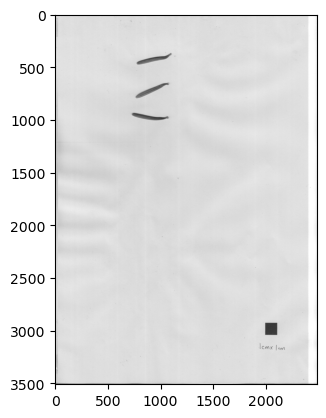

In [13]:
plt.imshow(leaf_array)

In [14]:
print(leaf_array.shape)

(3508, 2480, 3)


(1008, 980, 3)


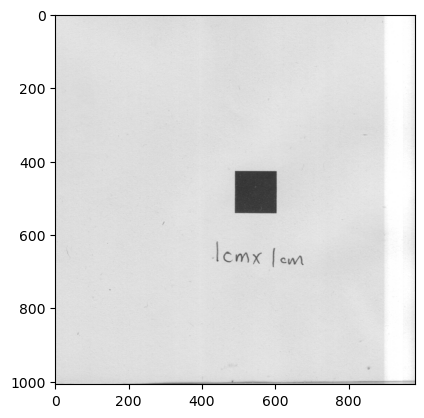

In [22]:
leaf_cut = leaf_array[2500:, 1500:]
print(leaf_cut.shape)
plt.imshow(leaf_cut)

(1008, 980)


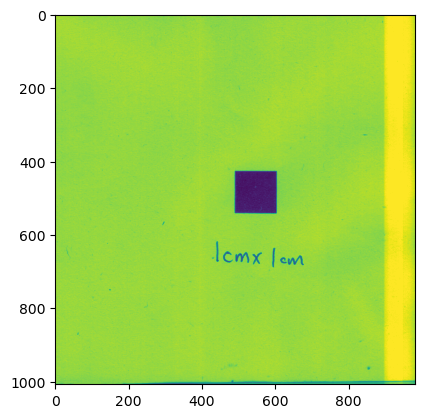

In [25]:
#black and white = 1 channel
leaf_min = np.min(leaf_cut, axis=2)
print(leaf_min.shape)
plt.imshow(leaf_min)

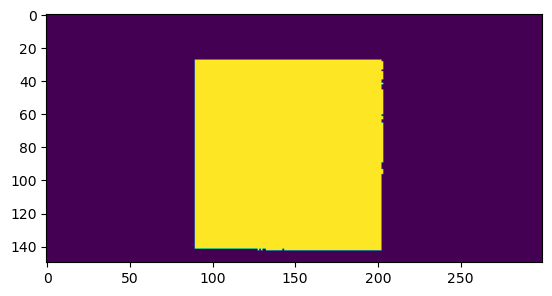

In [31]:
#0-255 to 0 or 1
leaf_binary = leaf_min < 150
leaf_binary = leaf_binary[400:550, 400:700]
plt.imshow(leaf_binary)

<class 'tuple'>


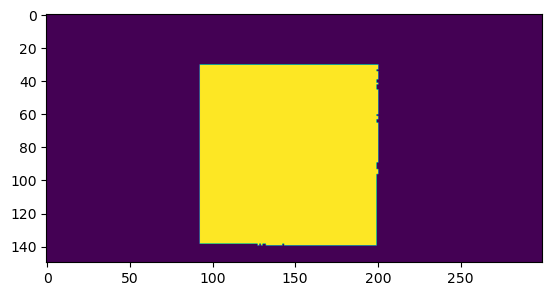

In [43]:
#contour
contours,hierarchy = cv2.findContours(leaf_binary.astype('uint8'), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
print(type(contours))
plt.imshow(cv2.drawContours(leaf_binary.astype('uint8'), contours, -1, (0,255,0), 3))

In [53]:
#finding the area of the square(contour)
for c in contours:
    area = cv2.contourArea(c)
    print(area)
    
pixel = np.sqrt(area)
print(pixel)

12781.5
113.05529620499873


130


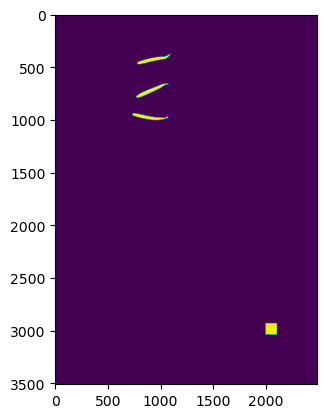

In [68]:
#img_1 contour
img_1_min = np.min(leaf_array, axis=2)
img_1_binary = img_1_min < 150
img_1_contour,hierarchy = cv2.findContours(img_1_binary.astype('uint8'), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
print(len(img_1_contour))
plt.imshow(cv2.drawContours(img_1_binary.astype('uint8'), img_1_contour, -1, (0,255,0), 3))

In [83]:
#1x1cm pixel value function
def scan_measure(scan_file):
    #reading file into cv
    scan_input = cv2.imread(scan_file)
    scan_cut = scan_input[2500:, 1500:]
    scan_min = np.min(scan_cut, axis=2)
    scan_binary = scan_min < 150
    scan_contours,hierarchy = cv2.findContours(scan_binary.astype('uint8'), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
    
    pixel_area_list = []
    for i in scan_contours:      
        area = cv2.contourArea(i)
        if area > 10000:
            pixel_area = np.sqrt(area)
            pixel_area_list.append(pixel_area)
        else:
            continue   
    if len(pixel_area_list) == 1:
        return pixel_area_list[0]
    else:
        print("multiple large contours detected")
            

In [82]:
#Loop to find 1x1cm cube length in pixels
for i in scans:
    print(i)
    print(scan_measure(i))

./data/AO1.1.tiff
113.05529620499873
./data/AO1.2.tiff
113.47686988985905
